<a href="https://colab.research.google.com/github/salsabilaTIF/Machine-Learning---Comparison-of-Classification-Algorithms/blob/main/Copy_of_Perbandingan_Algoritma_Supervised_Learning_Pada_Klasifikasi_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIABETES

Diabetes mellitus adalah salah satu penyakit kronis yang signifikan dan semakin meluas di seluruh dunia. Ini adalah gangguan metabolik yang ditandai oleh peningkatan kadar gula darah dalam tubuh. Diabetes memiliki dampak besar pada kualitas hidup individu dan dapat menyebabkan komplikasi serius, termasuk masalah jantung, gangguan mata, kerusakan saraf, dan masalah ginjal.

Terdapat beberapa jenis diabetes, termasuk diabetes tipe 1 dan tipe 2, dengan yang terakhir lebih umum terjadi. Diabetes tipe 2 seringkali terkait dengan gaya hidup yang tidak sehat, termasuk pola makan yang buruk dan kurangnya aktivitas fisik.

Ketepatan diagnosis dan manajemen diabetes sangat penting untuk mencegah komplikasi serius. Oleh karena itu, perlu dilakukan penelitian dan klasifikasi untuk memahami dan memprediksi risiko diabetes, sehingga tindakan pencegahan dan pengelolaan yang sesuai dapat diambil.

# Rumusan Masalah

1. Apakah informasi yang bisa diperoleh dari data Diabetes?
2. Apakah algoritma/model terbaik untuk melakukan klasifikasidata data Diabetes?
3. Apakah rekomendasi yang bisa diberikan?

Latar belakang yang diperbarui untuk diabetes:

# Dataset dan Variabel yang Digunakan

Dataset ini terdiri dari beberapa variabel yang digunakan untuk menganalisis diabetes. Terdapat beberapa variabel kategorikal dan kontinu yang mencakup informasi berikut:

<table style="width: 100%">
<thead>
<tr>
<th style="text-align: center; font-weight: bold; font-size:14px;">Nama Variabel</th>
<th style="text-align: center; font-weight: bold; font-size:14px;">Deskripsi</th>
<th style="text-align: center; font-weight: bold; font-size:14px;">Contoh Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Pregnancies</b></td>
<td>Jumlah kehamilan</td>
<td>5</td>
<tr>
    <td><b>Glucose</b></td>
    <td>Kadar Glukosa dalam darah</td>
    <td>140</td>
</tr>
<tr>
    <td><b>BloodPressure</b></td>
    <td>Pengukuran Tekanan Darah</td>
    <td>80</td>
</tr>
<tr>
    <td><b>SkinThickness</b></td>
    <td>Tebal Kulit</td>
    <td>30</td>
</tr>
<tr>
    <td><b>Insulin</b></td>
    <td>Kadar Insulin dalam darah</td>
    <td>150</td>
</tr>
<tr>
    <td><b>BMI</b></td>
    <td>Indeks Massa Tubuh</td>
    <td>26.7</td>
</tr>
<tr>
    <td><b>DiabetesPedigreeFunction</b></td>
    <td>Presentase Risiko Diabetes</td>
    <td>0.687</td>
</tr>
<tr>
    <td><b>Age</b></td>
    <td>Usia</td>
    <td>35</td>
</tr>
<tr>
    <td><b>Outcome</b></td>
    <td>Hasil Akhir (1 adalah Ya, 0 adalah Tidak)</td>
    <td>1</td>
</tr>
</tbody>
</table>

Variabel-variabel ini digunakan untuk menganalisis dan memahami faktor-faktor yang berkontribusi terhadap diabetes. Dengan memeriksa variabel-variabel ini, kita dapat mengidentifikasi pola dan tren yang berkaitan dengan risiko dan hasil diabetes.

# Import Library

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

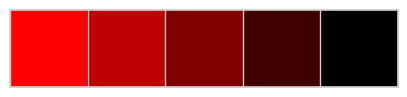

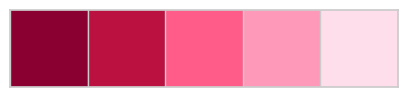

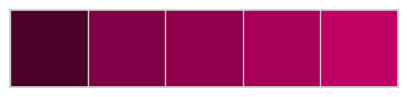

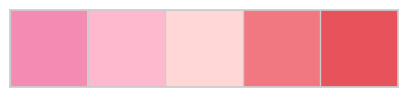

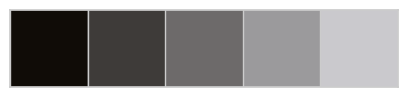

In [ ]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

# Membaca Dataset

In [ ]:
#Import dataset Indeks Pembangunan Manusia
df = pd.read_csv('/content/diabetes.csv')

#Show Dataset
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#Number of row and column
df.shape



(768, 9)

In [ ]:
#Dataset Detail
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pada Dataset Diabetes tidak terdapat Missing Value sehingga tidak perlu dilakukan cleaning data dari missing value

In [ ]:
#Target Class Detail
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df[df['Outcome']== 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [ ]:
count = df[(df['Outcome'] == 1) & (df['Age'] < 50)].shape[0]
print("Penderita Diabetes dengan umur dibawah 50 tahun adalah ", count, "Orang")

Penderita Diabetes dengan umur dibawah 50 tahun adalah  225 Orang


# EDA (Exploration Data Analys)


EDA dilakukan untukmenemukan pola mendeteksi anomali pengujian hipotesis dan untuk memvalidasi asumsi menggunakan statistik ringkasan dan representasi visual lainnya. EDA juga digunakan untuk menentukan algoritma yang paling cocok untuk dataset



# Category Variabel

1. Outcome

******************************
.: Chest Pain Type Total :.
******************************


0    500
1    268
Name: Outcome, dtype: int64

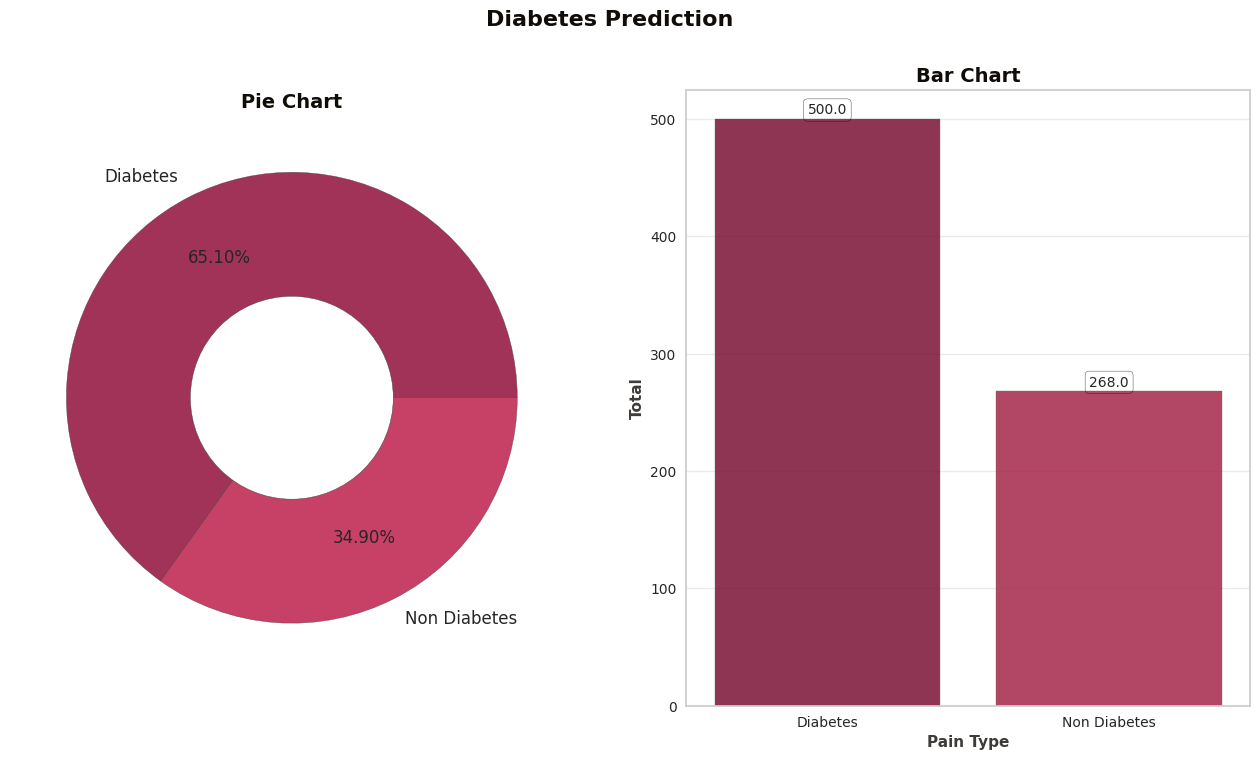

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:4]
labels=['Diabetes','Non Diabetes']
order=df['Outcome'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Diabetes Prediction', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['Outcome'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Bar Chart ---
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
ax = sns.countplot(x='Outcome', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.Outcome.value_counts(dropna=False)

Dapat dilihat bersama, bahwasanya persebaran jumlah antara masing-masing kelas memiliki jarak yang cukup jauh, sehingga terjadi imbalance data. Ternyata di terdapat 500 penderita Diabetes dan 268 Non Diabetes

# Numerical Variable

# Descriptive Statistic

In [ ]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


# HeatMap

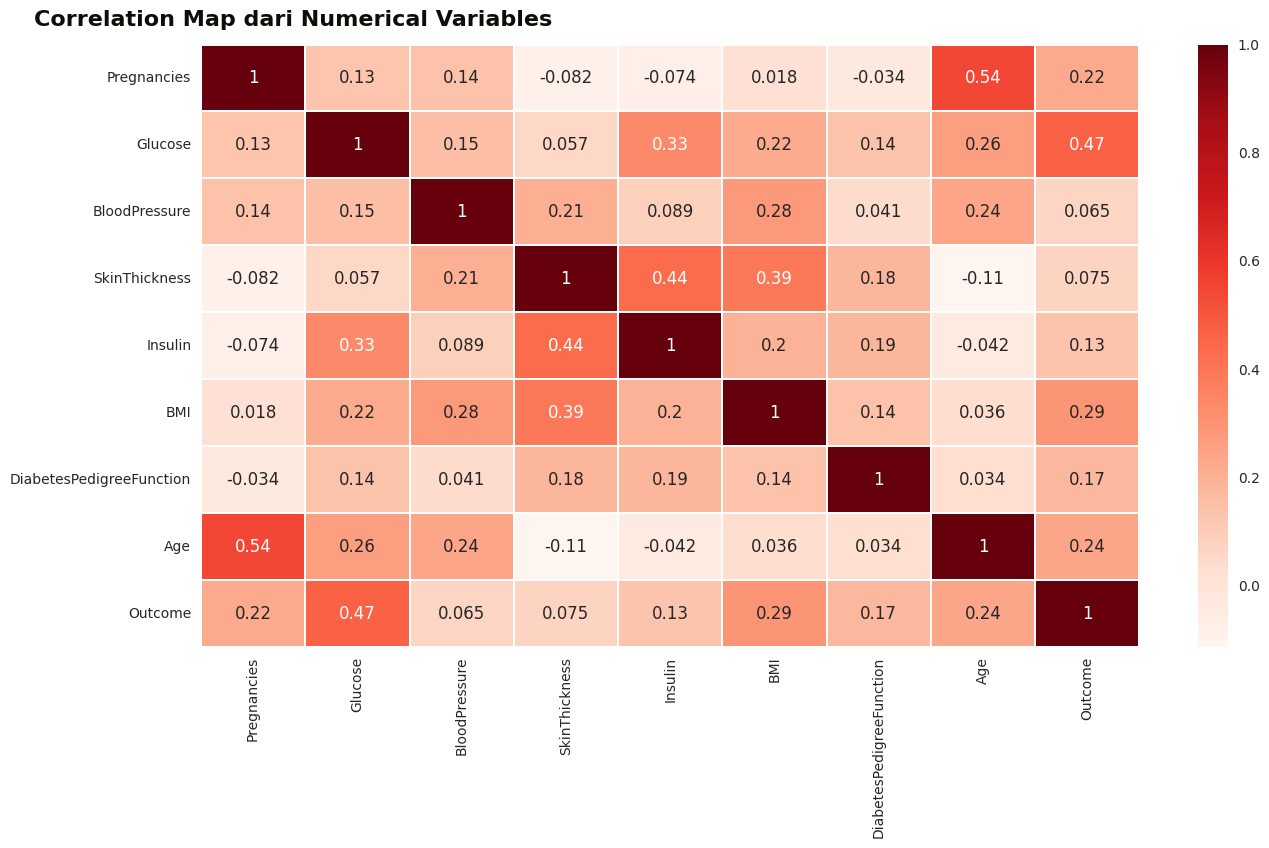

In [ ]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map dari Numerical Variables', fontweight='heavy',
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif',
             color=black_grad[0])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

Dapat dilihat bersama, korelasi dari masing-masing variable. Korelasi paling tinggi adalah Age dan Pregnancies

# Pre-Processing

Preprocessing yang dilakukan diantaranya adalah:

   
1. Features Separating
Memisahkan antara dependent column dengan dengan independent column
2. Splitting Dataset
Dataset akan dibagi ke dalam perbandingan(80% training dan 20% testing).

    
    

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['Outcome'].unique()

array([1, 0])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Separating

In [ ]:
#Feature Separating
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Splitting Dataset

In [ ]:
#Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

# Modeling

Ada 5 Model atau algoritma yang akan digunakan, yaitu

1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbour (KNN)
4. Random Forest
5. AdaBoost

# Logistic Regretion

In [ ]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)

y_pred_LR = LRclassifier.predict(X_test)

.:. Logistic Regression Accuracy: 74.68% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


.: Performance Evaluation
**************************


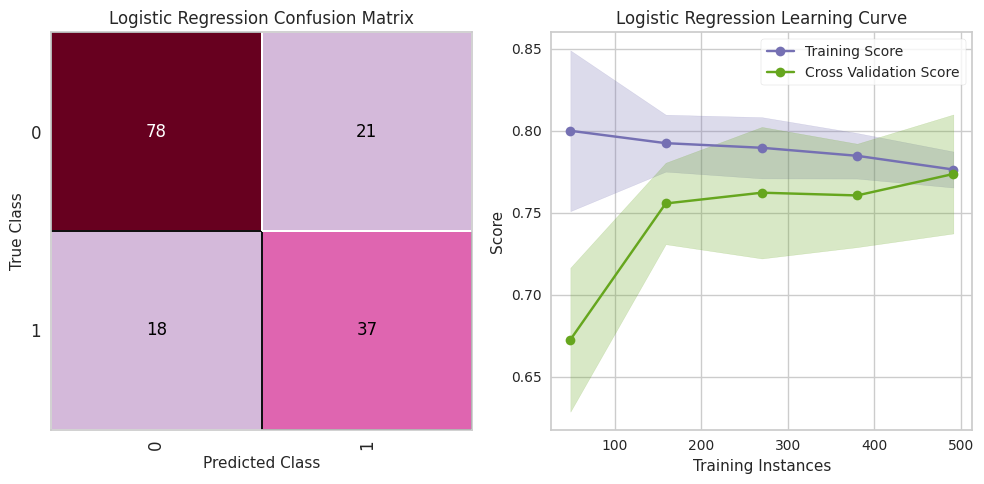

In [ ]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax2, title='Logistic Regression Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

plt.tight_layout();

In [ ]:
LR = LRclassifier.score(X_train, y_train)
print('Skor akurasi data latih:', LR)
print('Skor akurasi data uji:', LRclassifier.score(X_test, y_test))
print('Skor akurasi prediksi:', LRAcc)

Skor akurasi data latih: 0.7719869706840391
Skor akurasi data uji: 0.7467532467532467
Skor akurasi prediksi: 0.7467532467532467


# Decision Tree

In [ ]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier()

DTCclassifier.fit(X_train, y_train)
y_pred_DTC = DTCclassifier.predict(X_test)

.:. Decision Tree Accuracy: 75.32% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154


.: Performance Evaluation
**************************


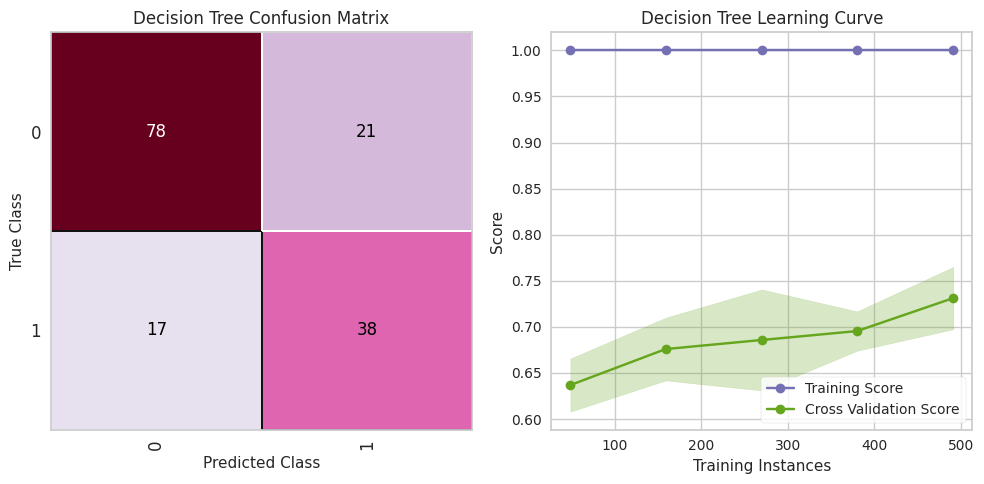

In [ ]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(X_train, y_train)
dtcmatrix.score(X_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax2, title='Decision Tree Learning Curve')
dtclc.fit(X_train, y_train)
dtclc.finalize()

plt.tight_layout();

In [ ]:
DT = DTCclassifier.score(X_train, y_train)
print('Skor akurasi data latih:', DT)
print('Skor akurasi data uji:', DTCclassifier.score(X_test, y_test))
print('Skor akurasi prediksi:', DTCAcc)

Skor akurasi data latih: 1.0
Skor akurasi data uji: 0.7532467532467533
Skor akurasi prediksi: 0.7532467532467533


# KNN

In [ ]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier()
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)

.:. K-Nearest Neighbour Accuracy: 66.23% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154


.: Performance Evaluation
**************************


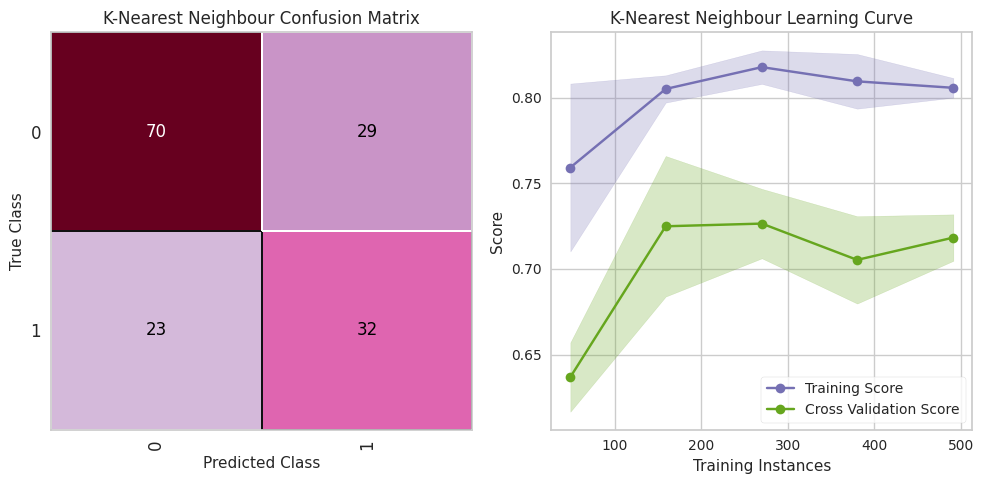

In [ ]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(X_train, y_train)
knnmatrix.score(X_test, y_test)
knnmatrix.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax2, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(X_train, y_train)
knnlc.finalize()

plt.tight_layout();

In [ ]:
KNN = KNNClassifier.score(X_train, y_train)
print('Skor akurasi data latih:', KNN)
print('Skor akurasi data uji:', KNNClassifier.score(X_test, y_test))
print('Skor akurasi prediksi:', KNNAcc)

Skor akurasi data latih: 0.7980456026058632
Skor akurasi data uji: 0.6623376623376623
Skor akurasi prediksi: 0.6623376623376623


# Random Forest

In [ ]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier()

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)

.:. Random Forest Accuracy: 75.32% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


.: Performance Evaluation
**************************


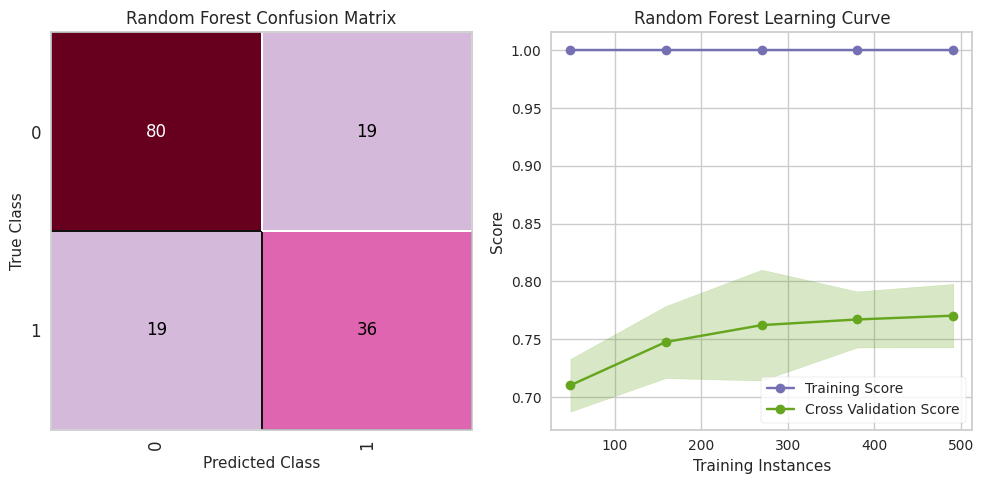

In [ ]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train, y_train)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax2, title='Random Forest Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

plt.tight_layout();

In [ ]:
RF = RFclassifier.score(X_train, y_train)
print('Skor akurasi data latih:', RF)
print('Skor akurasi uji:', RFAcc)

Skor akurasi data latih: 1.0
Skor akurasi uji: 0.7532467532467533


# Adabost

In [ ]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier()

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)

.:. AdaBoost Accuracy: 73.38% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


.: Performance Evaluation
**************************


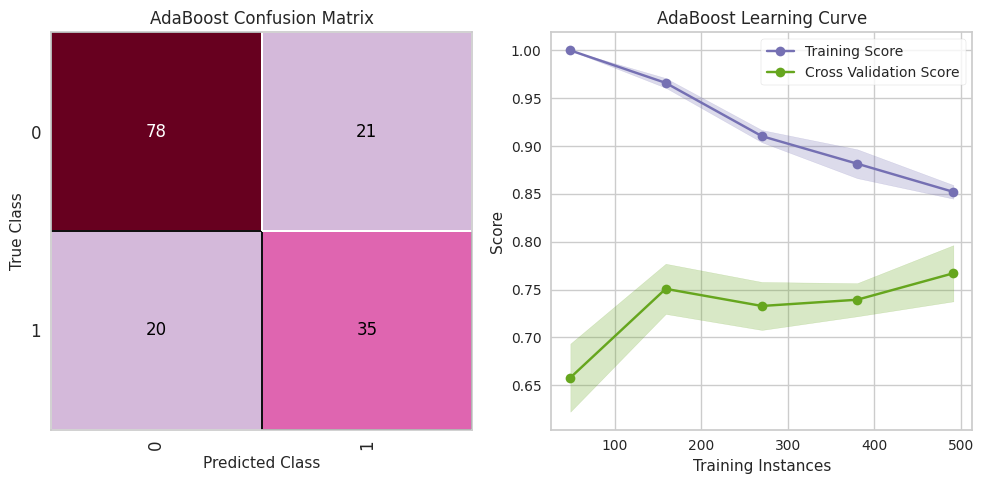

In [ ]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(X_train, y_train)
abcmatrix.score(X_test, y_test)
abcmatrix.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax2, title='AdaBoost Learning Curve')
ablc.fit(X_train, y_train)
ablc.finalize()


plt.tight_layout();

In [ ]:
AB = ABclassifier.score(X_train, y_train)
print('Skor akurasi data latih:', AB)
print('Skor akurasi prediksi:', ABAcc)

Skor akurasi data latih: 0.8355048859934854
Skor akurasi prediksi: 0.7337662337662337


# Adaboost With SMOTE Balancing

In [ ]:
ABclassifierSMOTE = AdaBoostClassifier()

ABclassifierSMOTE.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB_SMOTE = ABclassifierSMOTE.predict(X_test)

.:. AdaBoost Accuracy: 12.50% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.64      0.44      0.52        16
         1.0       0.62      0.07      0.12       227
         2.0       0.00      0.00      0.00       164
         3.0       0.08      1.00      0.15        33

    accuracy                           0.12       440
   macro avg       0.34      0.38      0.20       440
weighted avg       0.35      0.12      0.09       440


.: Performance Evaluation
**************************


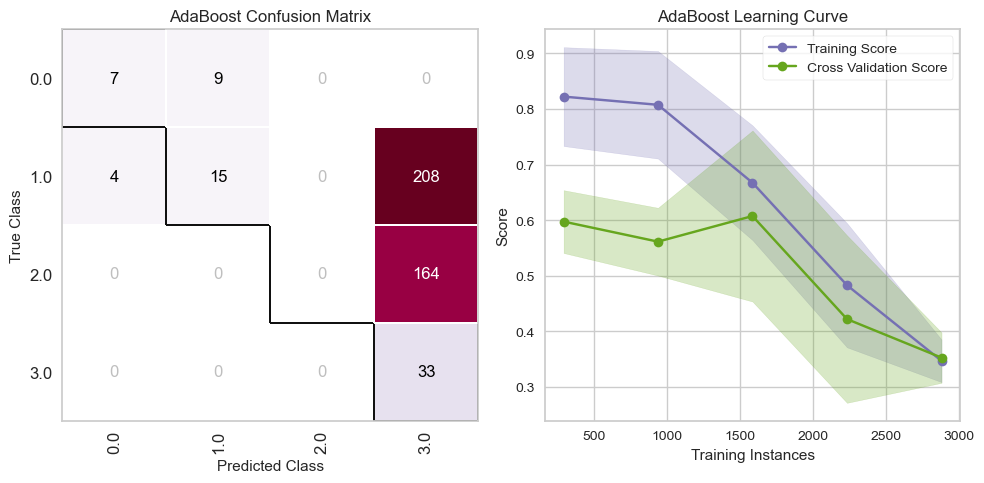

In [ ]:
# --- AdaBoost Accuracy ---
ABSMOTEAcc = accuracy_score(y_pred_AB_SMOTE, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABSMOTEAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB_SMOTE))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifierSMOTE, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(X_train_SMOTE, y_train_SMOTE)
abcmatrix.score(X_test, y_test)
abcmatrix.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifierSMOTE, ax=ax2, title='AdaBoost Learning Curve')
ablc.fit(X_train_SMOTE, y_train_SMOTE)
ablc.finalize()


plt.tight_layout();

In [ ]:
ABSMOTE = ABclassifierSMOTE.score(X_train_SMOTE, y_train_SMOTE)
print('Skor akurasi data latih:', ABSMOTE)
print('Skor akurasi prediksi:', ABSMOTEAcc)

Skor akurasi data latih: 0.3157602663706992
Skor akurasi prediksi: 0.125


# Perbandingan Akurasi Data Latih dan Data Uji Tanpa Imbalancing Data

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model Data Latih': ['Logistic Regression', 'K-Nearest Neighbour',
                                  'Decision Tree', 'Random Forest', 'AdaBoost'],
                        'Akurasi Data Latih': [LR*100, KNN*100, DT*100, RF*100, AB*100],
                        'Model Data Uji': ['Logistic Regression', 'K-Nearest Neighbour',
                                  'Decision Tree', 'Random Forest', 'AdaBoost'],
                        'Akurasi Data Uji': [LRAcc*100, KNNAcc*100, DTCAcc*100, RFAcc*100, ABAcc*100]
                       })


# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Akurasi Data Latih', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model Data Latih,Akurasi Data Latih,Model Data Uji,Akurasi Data Uji
Decision Tree,100.000000,Decision Tree,75.324675
Random Forest,100.000000,Random Forest,75.324675
AdaBoost,83.550489,AdaBoost,73.376623
K-Nearest Neighbour,79.804560,K-Nearest Neighbour,66.233766
Logistic Regression,77.198697,Logistic Regression,74.675325


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Prediction Case

In [ ]:
# --- Turn Information into List ---
data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]
data_2 = [[1, 85, 66, 29, 0, 26.6, 0.351, 31]]
# --- Prediction---
result = RFclassifier.predict(data)

# --- Print Heart Disease Status ---
if result[0] == 0:
  print("Non Diabates")
if result[0] == 1:
  print("Diabetes")

Diabetes


Setelah diberikan data baru, algoritma mampu memprediksi data yang diberikan dengan akurat

# Kesimpulan

A. Apakah informasi yang bisa diperoleh dari data IPM?

1. Jumlah penderita diabetes dan non diabetes memiliki selisih yang cukup jauh, yakni terdapat 500 Diabetes dan 268 Non Diabetes

2. Rata-rata umur penderita diabetes yakni 37 tahun

3. Jumlah penderita diabetes yang berada di bawah 50 tahun ada 225 orang

B. Apakah algoritma/model terbaik untuk melakukan klasifikasi data IPM?

Random Forest dan decision tree
C. Apakah rekomendasi yang bisa diberikan?

1. Model yang digunakan belum dimaksimalkan, akurasi algoritma masih bisa ditingkatkan dengan pre-processing yang lebih maksimal
2. Diharapkan agar orang-orang dengan usia entang 37 tahu agar rutin cek kesehatan, karena dari hasil statistik menunjukkan penderita diabetes memiliki rata-rata usia 37 tahun